# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [4]:
df = pd.read_csv('linear1.csv')

In [7]:
df

,Size,Price
0,1056,39.07
1,2600,120.00
2,1440,62.00
3,1521,95.00
4,1200,51.00
5,1170,38.00
6,2732,204.00
7,3300,600.00
8,1310,63.25
9,1020,370.00


In [8]:
df.head()

,Size,Price
0,1056,39.07
1,2600,120.00
2,1440,62.00
3,1521,95.00
4,1200,51.00


In [9]:
df.head(10)

,Size,Price
0,1056,39.07
1,2600,120.00
2,1440,62.00
3,1521,95.00
4,1200,51.00
5,1170,38.00
6,2732,204.00
7,3300,600.00
8,1310,63.25
9,1020,370.00


In [10]:
df.shape

(30, 2)

In [11]:
df.isnull().sum()

Size     0
Price    0
dtype: int64

In [12]:
df.isnull().any()

Size     False
Price    False
dtype: bool

In [13]:
x = df[['Size']] #independent
y = df[['Price']] #dependent or predict

In [27]:
x

,Size
0,1056
1,2600
2,1440
3,1521
4,1200
5,1170
6,2732
7,3300
8,1310
9,1020


In [28]:
y

,Price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00
5,38.00
6,204.00
7,600.00
8,63.25
9,370.00


# Visualization

Text(0.5, 1.0, 'Home Price')

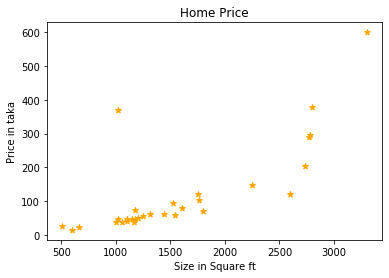

In [14]:
plt.scatter(df['Size'], df['Price'], marker='*', color='orange')
plt.xlabel('Size in Square ft')
plt.ylabel('Price in taka')
plt.title('Home Price')

# Train test data split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=.25, random_state=1)

In [58]:
xTrain

,Size
24,510
22,2800
23,1767
4,1200
2,1440
25,1250
6,2732
18,2770
13,1100
7,3300


In [19]:
yTrain

,Price
24,25.25
22,380.00
23,103.00
4,51.00
2,62.00
25,56.00
6,204.00
18,290.00
13,40.00
7,600.00


# Model

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression()

In [77]:
lr.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
pr =lr.predict(xTest)

In [94]:
pr

array([[125.94197089],
       [157.30608373],
       [163.87066549],
       [ 61.75494927],
       [229.51648305],
       [-11.18484803],
       [ -2.43207235],
       [123.17025859]])

In [95]:
xTest

,Size
17,1540
21,1755
10,1800
19,1100
14,2250
20,600
26,660
3,1521


In [96]:
lr.predict(yTest)

array([[-89.95982911],
       [-80.91529424],
       [-88.50103316],
       [-91.71038424],
       [-77.12242479],
       [-96.52441087],
       [-95.34278615],
       [-84.8540433 ]])

In [97]:
yTest

,Price
17,60.0
21,122.0
10,70.0
19,48.0
14,148.0
20,15.0
26,23.1
3,95.0


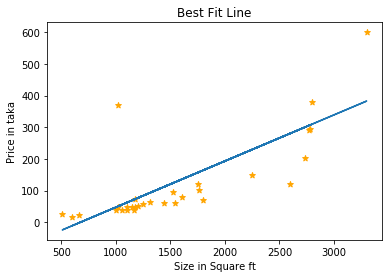

In [98]:
plt.scatter(df['Size'], df['Price'], marker='*', color='orange')
plt.xlabel('Size in Square ft')
plt.ylabel('Price in taka')
plt.title('Best Fit Line')
plt.plot(df.Size, lr.predict(df[['Size']]))

In [83]:
lr.predict([[1700]]) #test using random value

array([[149.28270603]])

# Validation

In [84]:
#Y = mx + c
lr.coef_ # value of m

array([[0.14587959]])

In [85]:
lr.intercept_ #value of c

array([-98.71260479])

In [86]:
Y = 0.14587959*1700 + (-98.71260479)

In [87]:
Y

149.28269821

# Performance

In [104]:
import sklearn.metrics as sm

In [105]:
lr.score(xTest,yTest)

-0.5410695353923829

In [106]:
print("Mean absolute error =", round(sm.mean_absolute_error(yTest, pr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(yTest, pr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(yTest, pr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(yTest, pr), 2)) 
print("R2 score =", round(sm.r2_score(yTest, pr), 2))

Mean absolute error = 46.28
Mean squared error = 2921.47
Median absolute error = 31.74
Explain variance score = 0.05
R2 score = -0.54
